# ***ΑΣΚΗΣΗ 2***

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
from torchvision import datasets, transforms


# Set device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the MNIST dataset
transform = transforms.ToTensor()
mnist_train = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
mnist_test = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(mnist_train, batch_size=64)
test_loader = DataLoader(mnist_test, batch_size=64)

# Define the autoencoder
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, 3) # map image to latent space - compression
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 32),
            nn.ReLU(),
            nn.Linear(32, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid() # probability of each pixel being black (or white)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize the model, loss function, and optimizer
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the autoencoder
num_epochs = 20
model.train()
for epoch in range(num_epochs):
    train_loss = 0
    for images, _ in train_loader:
        images = images.view(images.size(0), -1).to(device) # flatten image for autoencoder input compatibility
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_loss:.4f}")



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 18.2MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 494kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.49MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.93MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1/20, Loss: 0.0562
Epoch 2/20, Loss: 0.0424
Epoch 3/20, Loss: 0.0396
Epoch 4/20, Loss: 0.0379
Epoch 5/20, Loss: 0.0368
Epoch 6/20, Loss: 0.0359
Epoch 7/20, Loss: 0.0353
Epoch 8/20, Loss: 0.0347
Epoch 9/20, Loss: 0.0344
Epoch 10/20, Loss: 0.0340
Epoch 11/20, Loss: 0.0337
Epoch 12/20, Loss: 0.0335
Epoch 13/20, Loss: 0.0333
Epoch 14/20, Loss: 0.0331
Epoch 15/20, Loss: 0.0329
Epoch 16/20, Loss: 0.0327
Epoch 17/20, Loss: 0.0326
Epoch 18/20, Loss: 0.0325
Epoch 19/20, Loss: 0.0323
Epoch 20/20, Loss: 0.0323


***ΕΡΩΤΗΜΑ Α***


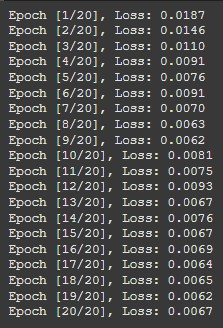

Η αρχιτεκτονική του autoencoder του εργαστηρίου φαίνεται να είναι καλύτερη στην φάση εκπαίδευσης, βάση του μέσου τετραγωνικού σφάλματος. Ο λόγος που συμβαίνει αυτό είναι ότι το σύστημα αυτής της άσκησης είναι πιο πολύπλοκο δομικά από αυτό της εργαστηρικής άσκησης.

Από τη στιγμή που χρησιμοποιούνται περισσότερα επίπεδα είναι απαραίτητο τουλάχιστον οι βασικές υπερπαράμετροι του συστήματος (learning rate, epochs, batch size κτλ) να ρυθμιστούν αναλόγως για να μπορέσει το σύστημα να έχει το περιθώριο να καταλήξει σε βέλτιστη λύση, όπως για παράδειγμα να μειωθεί το learning rate ώστε να μην ταλαντώνεται το σύστημα γύρω από κάποιο ακρότατο ή να το ξεπεράσει τελείως. Αυτή είναι μια πιθανή αιτία που παρατηρείται μεγαλύτερο MSE στο πιο σύνθετο σύστημα.

Μια άλλη αιτία θα μπορούσε να είναι η ανεπάρκεια (σε μέγεθος) του dataset, που να μην επιτρέπει την εξαγωγή αρκετών χαρακτηριστικών σε επιθυμητό βαθμό, όπως και η υπερβολική μείωση των διαστάσεων του προβλήματος που περιγράφει με πιο αδρό τρόπο την εικόνα.

60000


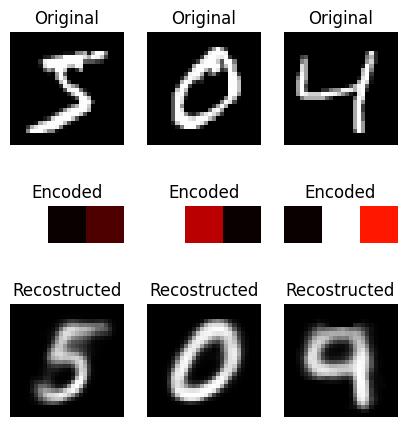

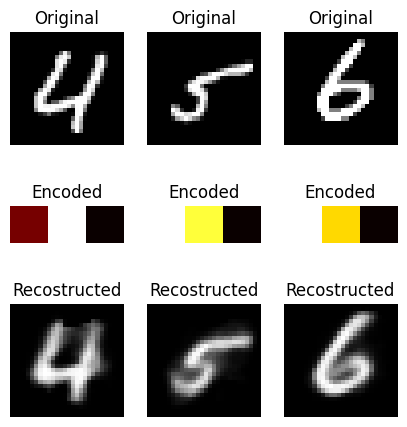

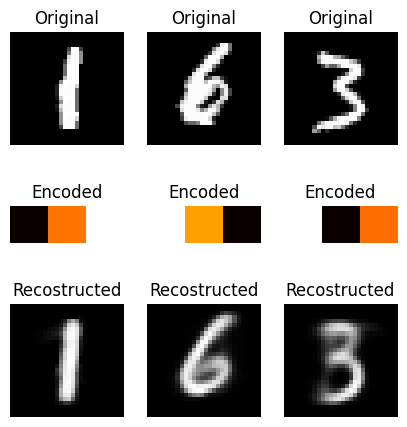

KeyboardInterrupt: 

In [ ]:
# Visualize training set latent space
model.eval()
with torch.no_grad():
    for data in train_loader:
        img, labels = data
        img = img.view(img.size(0), -1).to(device)
        # Encode the input images
        encoded_imgs = model.encoder(img)
        rec_imgs = model.decoder(encoded_imgs)

        # Visualize the original, encoded and reconstructed images
        plt.figure(figsize=(5, 5))
        for i in range(3):
            # Original images
            plt.subplot(3, 3, i + 1)
            plt.imshow(img[i].cpu().numpy().reshape(28, 28), cmap='gray') # return img to cpu for numpy operations (plotting etc) bc they can only be done in the cpu
            plt.title('Original')
            plt.axis('off')

            # Latent representation
            plt.subplot(3, 3, i + 4)
            plt.imshow(encoded_imgs[i].cpu().numpy().reshape(1,3), cmap='hot')  # Displaying latent vector as colors
            plt.title('Encoded')
            plt.axis('off')

            # Recostructed images
            plt.subplot(3, 3, i + 7)
            plt.imshow(rec_imgs[i].cpu().numpy().reshape(28, 28), cmap='gray')
            plt.title('Recostructed')
            plt.axis('off')

        plt.show()
        break

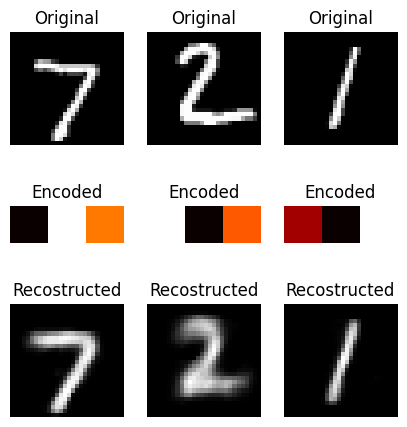

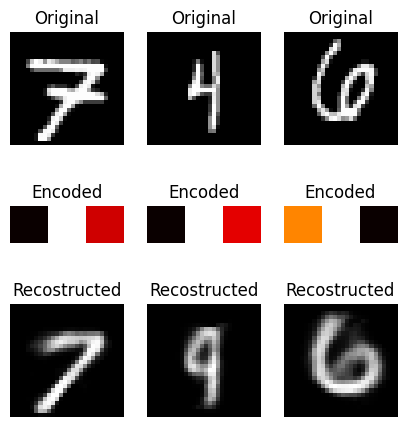

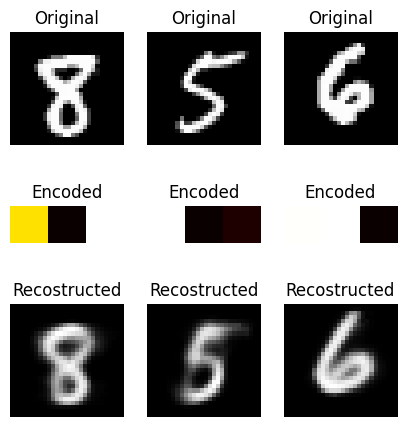

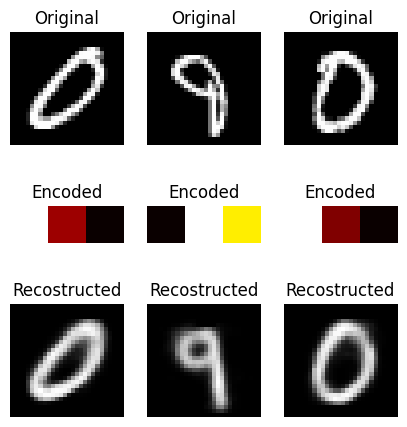

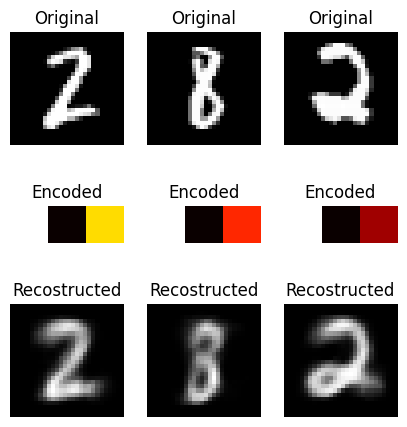

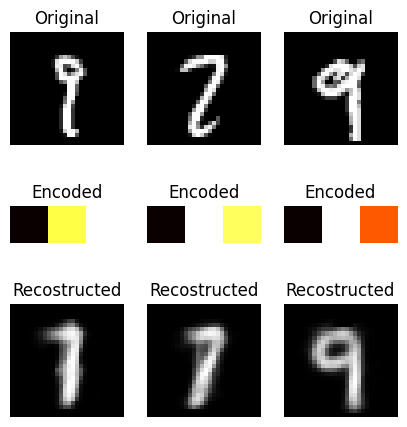

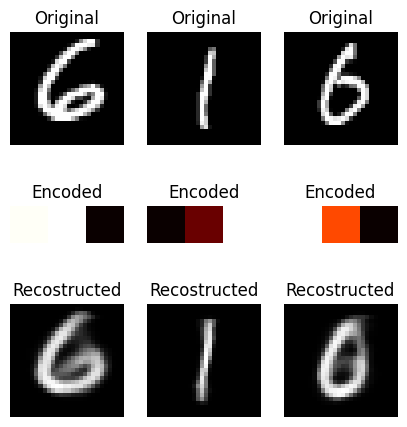

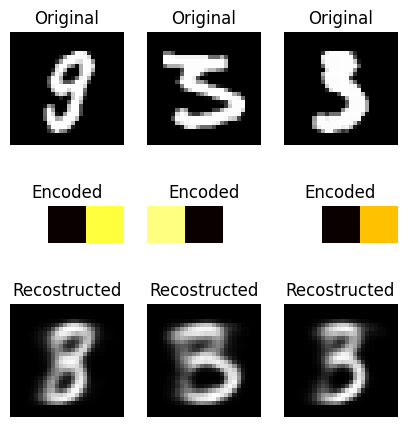

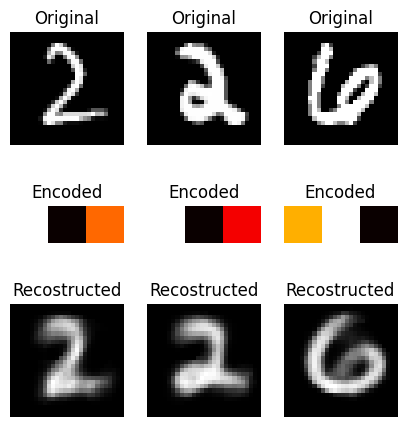

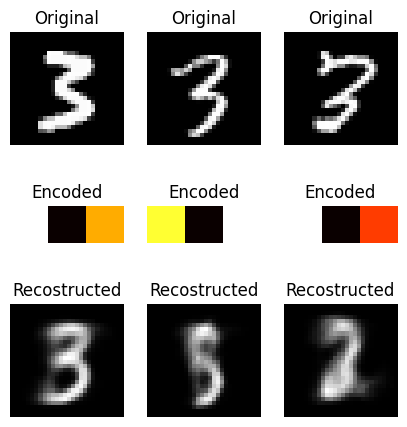

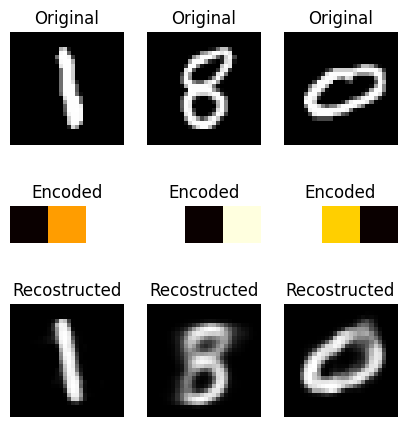

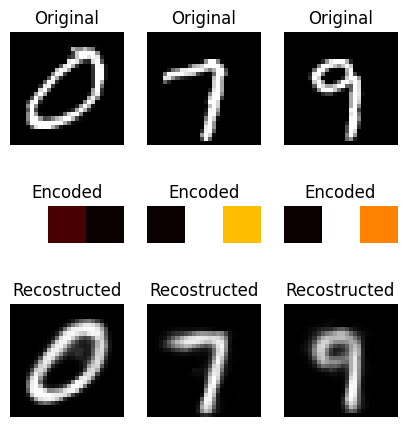

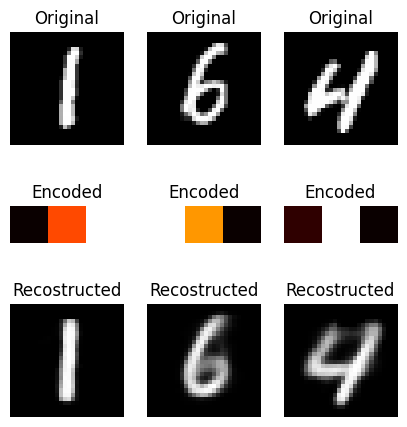

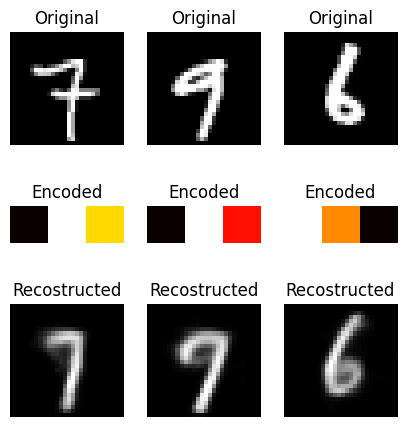

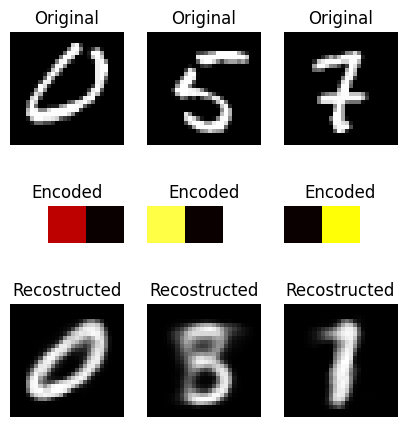

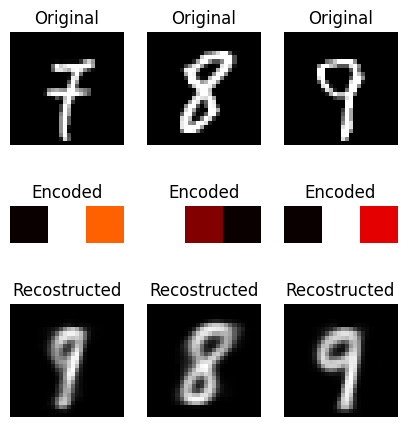

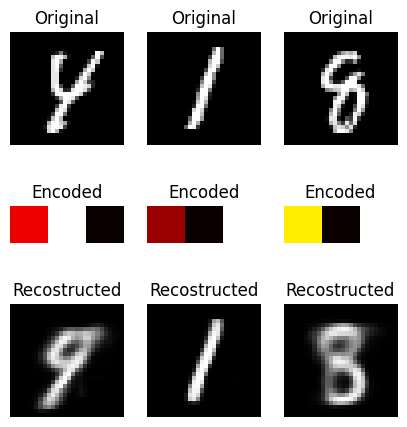

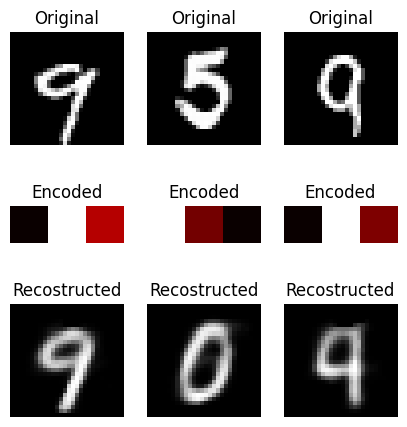

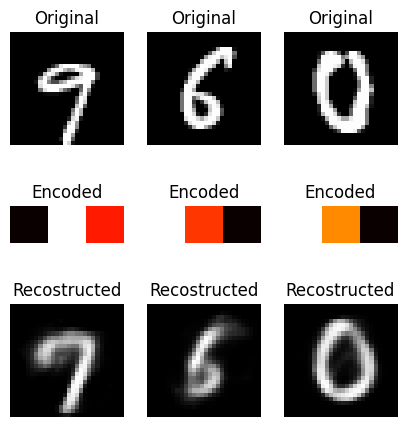

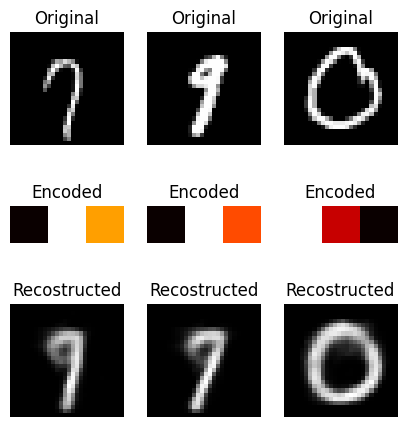

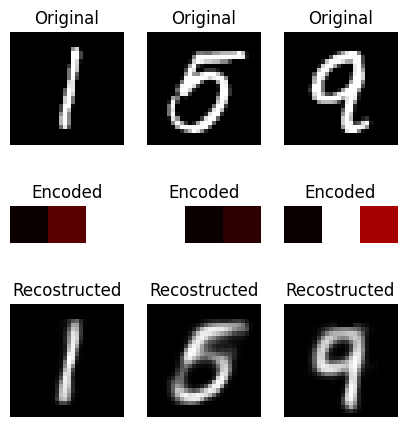

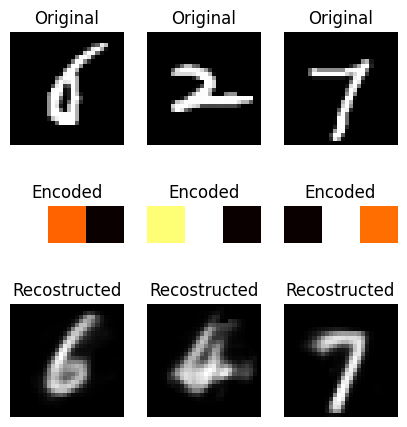

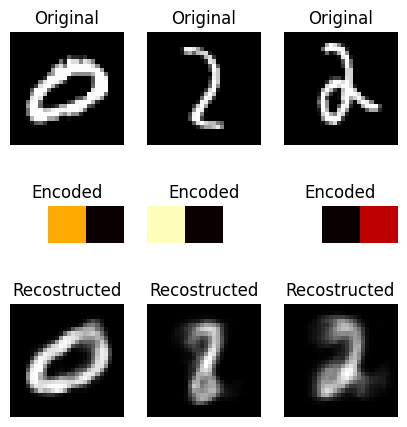

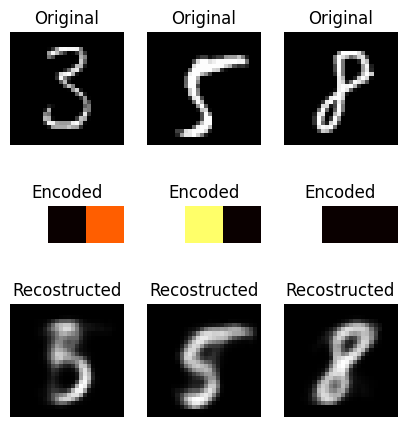

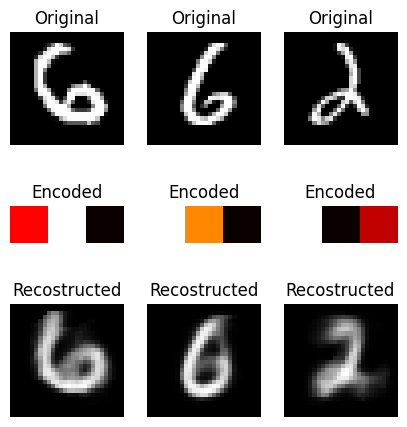

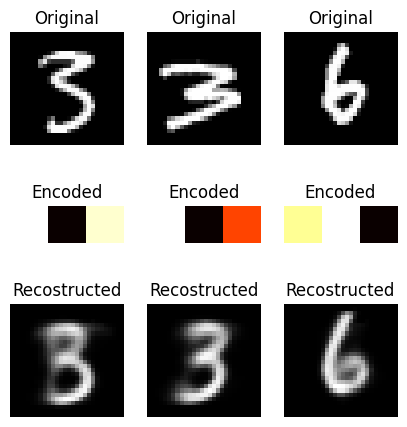

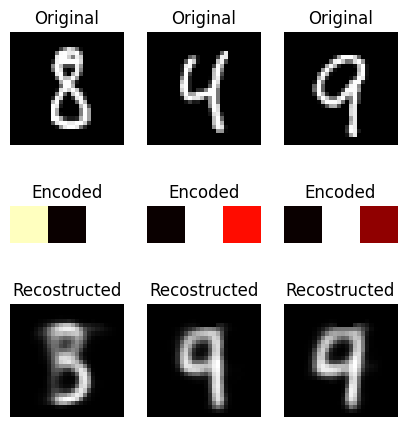

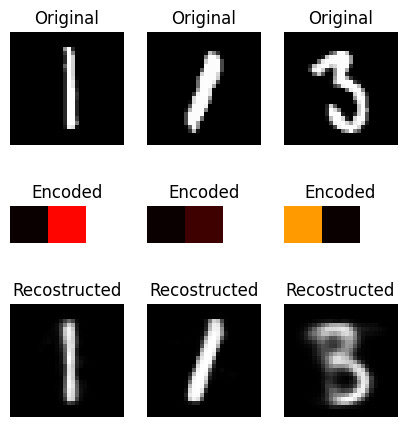

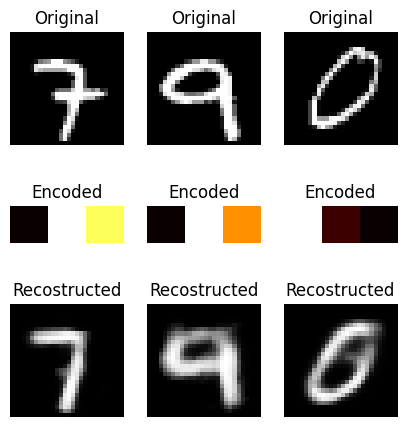

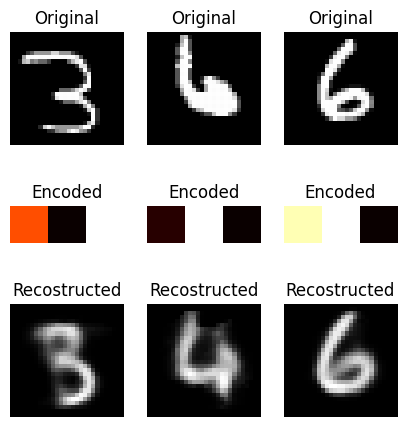

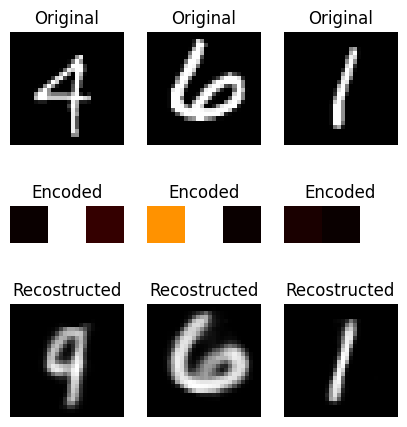

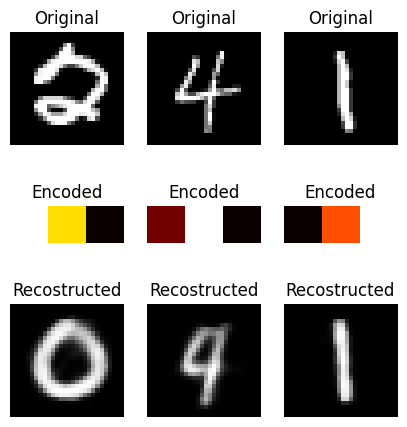

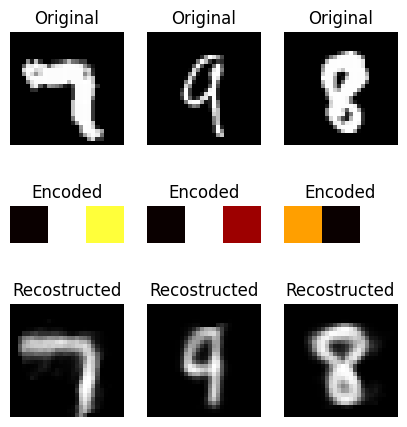

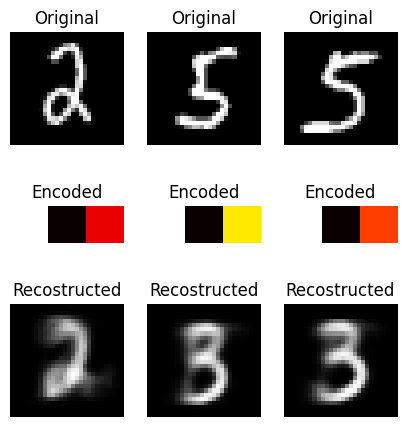

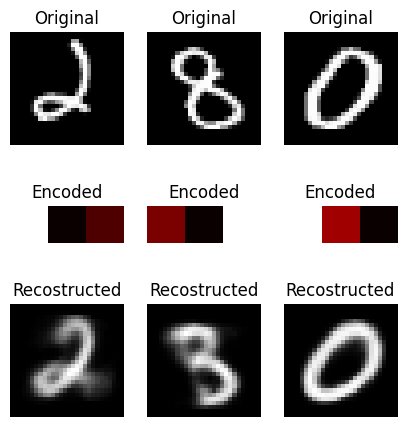

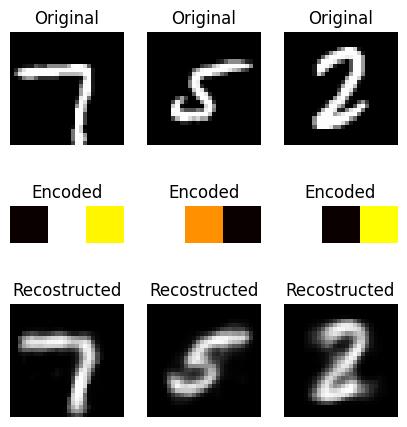

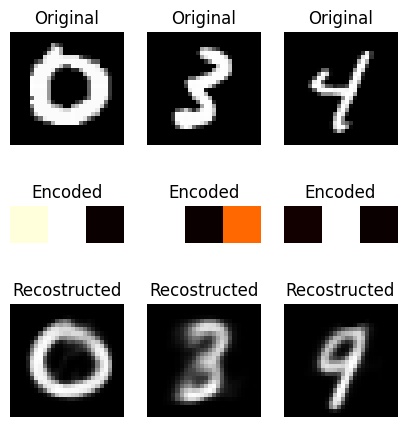

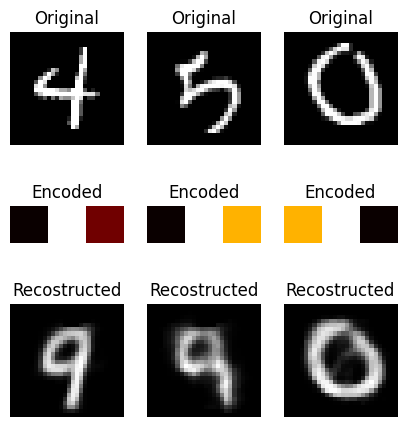

KeyboardInterrupt: 

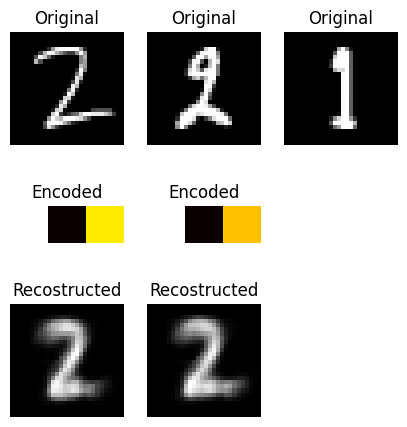

In [ ]:
# Visualize test set latent space
model.eval()
with torch.no_grad():
    for data in test_loader:
        img, labels = data
        img = img.view(img.size(0), -1).to(device)
        # Encode the input images
        encoded_imgs = model.encoder(img)
        rec_imgs = model.decoder(encoded_imgs)

        # Visualize the original, encoded and reconstructed images
        plt.figure(figsize=(5, 5))
        for i in range(3):
            # Original images
            plt.subplot(3, 3, i + 1)
            plt.imshow(img[i].cpu().numpy().reshape(28, 28), cmap='gray') # return img to cpu for numpy operations (plotting etc) bc they can only be done in the cpu
            plt.title('Original')
            plt.axis('off')

            # Latent representation
            plt.subplot(3, 3, i + 4)
            plt.imshow(encoded_imgs[i].cpu().numpy().reshape(1,3), cmap='hot')  # Displaying latent vector as colors
            plt.title('Encoded')
            plt.axis('off')

            # Recostructed images
            plt.subplot(3, 3, i + 7)
            plt.imshow(rec_imgs[i].cpu().numpy().reshape(28, 28), cmap='gray')
            plt.title('Recostructed')
            plt.axis('off')

        plt.show()
        break

In [9]:
# Function to extract latent representations
def extract_latent_representations(data_loader):
    latent_space = []
    labels = []
    with torch.no_grad():
        for images, targets in data_loader:
            images = images.view(images.size(0), -1).to(device)  # Flatten images
            latent = model.encoder(images)  # Pass through the encoder
            latent_space.append(latent.cpu().numpy()) # Append numpy array that contains latent space coords of a single batch
            labels.append(targets.numpy()) # Same for ground truth labels
    return np.concatenate(latent_space), np.concatenate(labels) # Turn everything to a single big numpy array

# Extract latent representations for training and test sets
train_latent, train_labels = extract_latent_representations(train_loader)
test_latent, test_labels = extract_latent_representations(test_loader)

# Matplotlib not interactive in Colab - switched to plotly
import plotly.graph_objects as go
import numpy as np

# Create a 3D scatter plot for the training set
train_fig = go.Figure()
train_fig.add_trace(go.Scatter3d(
    x=train_latent[:, 0],
    y=train_latent[:, 1],
    z=train_latent[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=train_labels,  # Color by class labels
        colorscale='Viridis',
        opacity=0.8,
        showscale=True,
        colorbar=dict(title="Class Labels")
    ),
    name="Training Set"
))
train_fig.update_layout(
    title="Training Set Latent Space",
    scene=dict(
        xaxis_title="Latent Dim 1",
        yaxis_title="Latent Dim 2",
        zaxis_title="Latent Dim 3"
    )
)

# Create a 3D scatter plot for the test set
test_fig = go.Figure()
test_fig.add_trace(go.Scatter3d(
    x=test_latent[:, 0],
    y=test_latent[:, 1],
    z=test_latent[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=test_labels,  # Color by class labels
        colorscale='Viridis',
        opacity=0.8,
        showscale=True,
        colorbar=dict(title="Class Labels")
    ),
    name="Test Set"
))
test_fig.update_layout(
    title="Test Set Latent Space",
    scene=dict(
        xaxis_title="Latent Dim 1",
        yaxis_title="Latent Dim 2",
        zaxis_title="Latent Dim 3"
    )
)

# Show the plots
train_fig.show()
test_fig.show()



***ΕΡΩΤΗΜΑ Β***

Φαίνεται να διατηρούνται οι κατανομές των συστάδων - 10 διαφορετικών εικόνων - χωρικά, ως προς τα χαρακτηριστικά τους Latent Dim 1, 2 & 3 συκγρίνοντας το test set και training set. Επίσης φαίνεται να υπάρχει μια ελαφριά επικάλυψη η οποία εξηγείται από τις πιο ασαφείς και "κακογραμμένες" εικόνες που υπάρχουν στο dataset, ενώ οι συστάδες είναι αρκετά κοντά μεταξύ τους, διότι όντας binary images δεν παρουσιάζουν τρομερές διαφορές μορφολογικά για να έχουν μεγάλη απόσταση σον χώρο των χαρακτηριστικών.

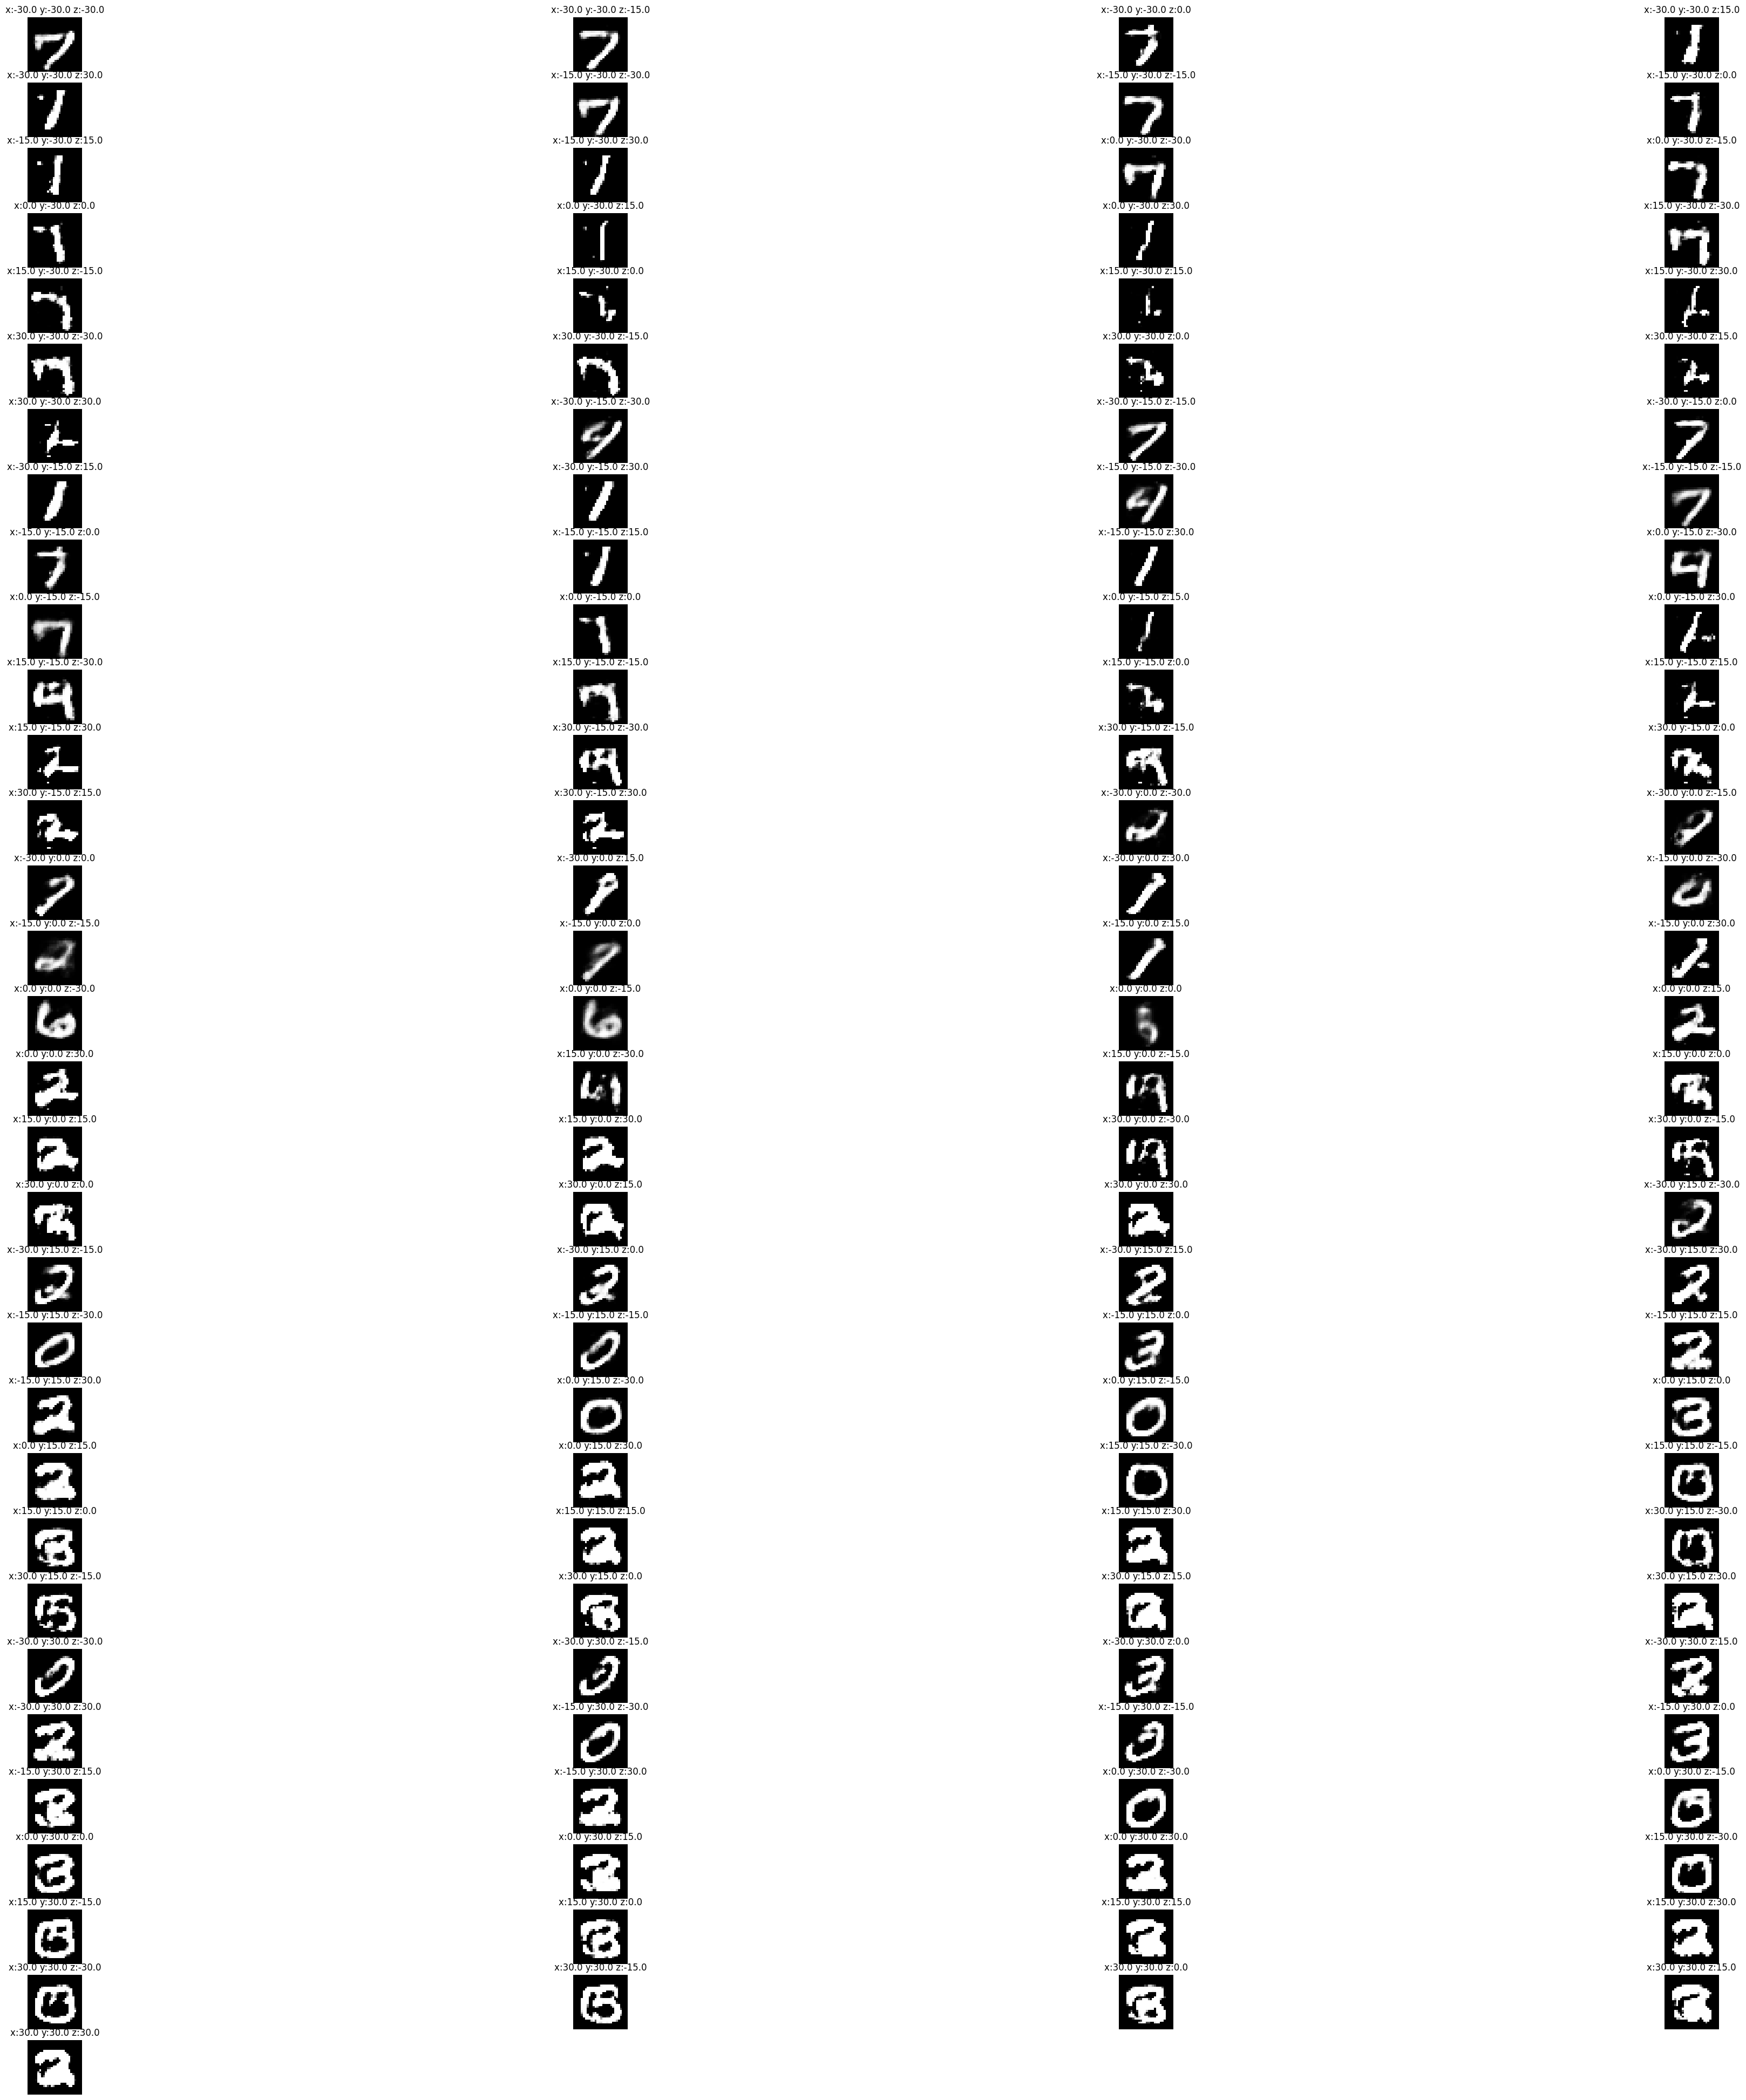

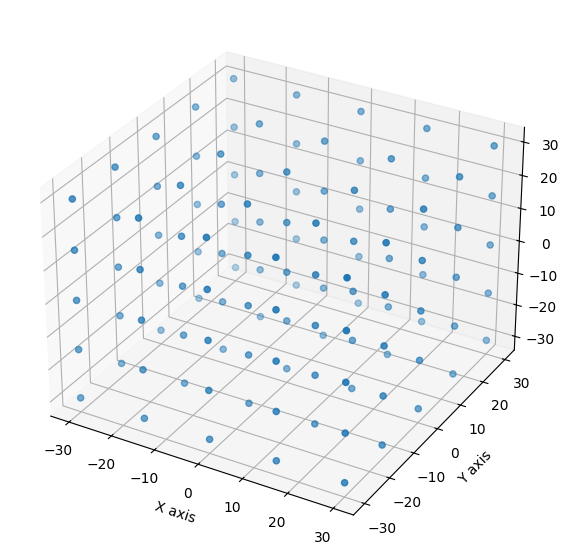

In [46]:
# Define the grid dimensions for latent space
x_range = np.linspace(-30, 30, 5)
y_range = np.linspace(-30, 30, 5)
z_range = np.linspace(-30, 30, 5)

# Create a meshgrid to generate a sparse grid of latent points
x_grid, y_grid, z_grid = np.meshgrid(x_range, y_range, z_range)

# Flatten the grid to get a list of 3D latent space points
grid_points = np.vstack([x_grid.ravel(), y_grid.ravel(), z_grid.ravel()]).T

# Convert to torch tensor
tensor_points = torch.tensor(grid_points).float().to(device) # typecast or else RuntimeError: mat1 and mat2 must have the same dtype, but got Double and Float

# Ensure the model is in evaluation mode
model.eval()

# Generate images from the latent vectors (grid points)
with torch.no_grad():
    generated_images = model.decoder(tensor_points)

# Visualize the generated images in a grid
plt.figure(figsize=(50, 50))
for i in range(len(generated_images)):
    plt.subplot(32, 4, i + 1)
    img = generated_images[i].cpu().numpy().reshape(28, 28)  # Reshape to 28x28 image
    plt.imshow(img, cmap='gray')
    plt.title(f"x:{tensor_points[i,0]} y:{tensor_points[i,1]} z:{tensor_points[i,2]}")
    plt.axis('off')

plt.show()

# Visualize the 3D points (for 3D grid)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tensor_points[:, 0], tensor_points[:, 1], tensor_points[:, 2])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()


***ΕΡΩΤΗΜΑ Γ***

Είναι φανερό πως κάθε σημείο του χώρου δεν αντιστοιχίζεται μονοσήμαντα σε έναν αριθμό αλλά έχει έναν βαθμό ομοιότητας, ανάλογα την εγγύτητα του στη συγκεκριμένη συστάδα. Αυτό σημαίνει πως π.χ. για σημεία πολύ μακριά από τα clusters θα βλέπουμε αριθμούς οι οποίοι μπορεί να έχουν κάποια ομοιότητα με ορισμένο νούμερο αλλά να είναι έντονα παραμορφωμένο γιατί τα χαρακτηριστικά εκείνα μπορεί να αφορούν π.χ το πάχος της γραμμής, ή η κατεύθυνσή του να μην ταυτίζεται απόλυτα με την κατευθυντικότητα της συστάδας - τη φορά του διανύσματος του κεντρικού σημείου μιας συστάδας. Χαρακτηριστικό παράδειγμα αποτελεί το grid point (30,15,15).Από την άλλη σημεία που βρίσκονται στα σύνορα συστάδων θα είναι παραμορφωμένα εξαιτίας της επικάλυψης 2 ή περισσότερων αριθμών (δηλαδή cluster). Χαρακτηριστικό παράδειγμα αποτελεί το grid point στην αρχή των αξόνων (0,0,0).